In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Final Parameters: theta0 = 0.09, theta1 = 1.97


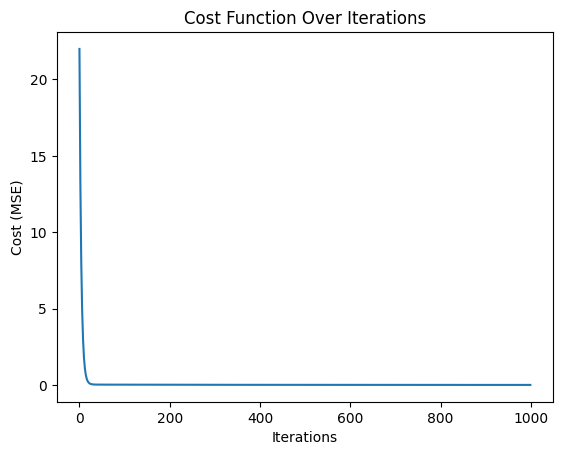

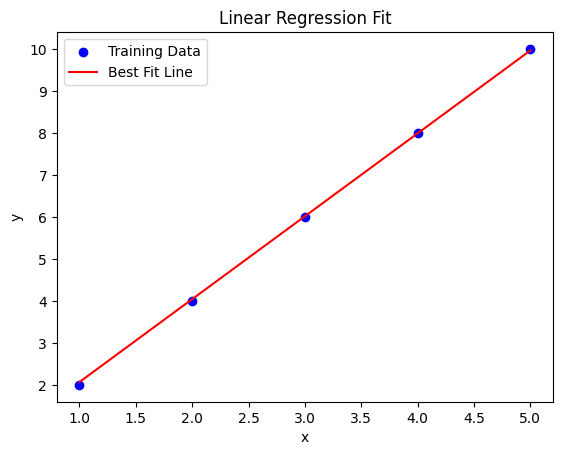

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the dataset
x = np.array([1, 2, 3, 4, 5])  # Input feature
y = np.array([2, 4, 6, 8, 10])  # Target values

# 2. Initialize parameters (theta0 = intercept, theta1 = slope)
theta0 = 0  # Initial intercept
theta1 = 0  # Initial slope

# 3. Hyperparameters
learning_rate = 0.01  # Step size
epochs = 1000  # Number of iterations
m = len(x)  # Number of data points

# 4. To store cost values for each iteration
cost_history = []

# 5. Gradient Descent Algorithm
for _ in range(epochs):
    # 5.1 Predict the values (y_pred = theta0 + theta1 * x)
    y_pred = theta0 + theta1 * x

    # 5.2 Compute the cost (Mean Squared Error)
    cost = (1 / (2 * m)) * np.sum((y_pred - y)**2)
    cost_history.append(cost)  # Save cost for plotting

    # 5.3 Compute the gradients
    d_theta0 = (1 / m) * np.sum(y_pred - y)  # Gradient for theta0
    d_theta1 = (1 / m) * np.sum((y_pred - y) * x)  # Gradient for theta1

    # 5.4 Update the parameters using the gradients
    theta0 -= learning_rate * d_theta0
    theta1 -= learning_rate * d_theta1

# 6. Print the final parameters
print(f"Final Parameters: theta0 = {theta0:.2f}, theta1 = {theta1:.2f}")
x
# 7. Plot the cost function over iterations
plt.plot(range(epochs), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.show()

# 8. Plot the best-fit line
plt.scatter(x, y, color='blue', label='Training Data')
plt.plot(x, theta0 + theta1 * x, color='red', label='Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()



Intercept (theta0): 5.329070518200751e-15
Coefficients (theta1, theta2): [1. 2.]


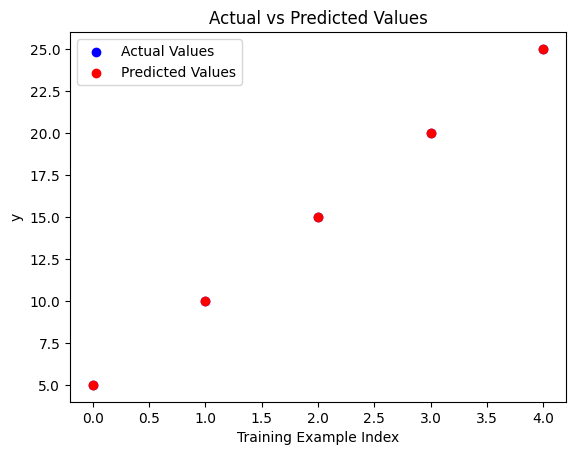

Mean Squared Error (MSE): 3.1554436208840472e-30
R^2 Score: 1.0


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Define the dataset (2 features + target)
X = np.array([[1, 2],    # Feature 1, Feature 2
              [2, 4],
              [3, 6],
              [4, 8],
              [5, 10]])  # Input feature matrix (m x n)
y = np.array([5, 10, 15, 20, 25])  # Target values (m,)

# 2. Create a Linear Regression model
model = LinearRegression()

# 3. Train the model (fit the model to the data)
model.fit(X, y)

# 4. Get the parameters (coefficients and intercept)
theta0 = model.intercept_  # Intercept (theta0)
theta1_theta2 = model.coef_  # Coefficients (theta1, theta2)

print(f"Intercept (theta0): {theta0}")
print(f"Coefficients (theta1, theta2): {theta1_theta2}")

# 5. Make predictions using the trained model
y_pred = model.predict(X)

# 6. Plot the Actual vs Predicted values
plt.scatter(range(len(y)), y, color='blue', label='Actual Values')
plt.scatter(range(len(y)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Training Example Index')
plt.ylabel('y')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

# Optional: Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
# Compute R^2 Score
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Linear Regression:
Mean Squared Error (MSE): 0.5558915986952438
R^2 Score: 0.5757877060324512

Polynomial Regression (Degree = 2):
Mean Squared Error (MSE): 0.4643015237347415
R^2 Score: 0.6456819729989774


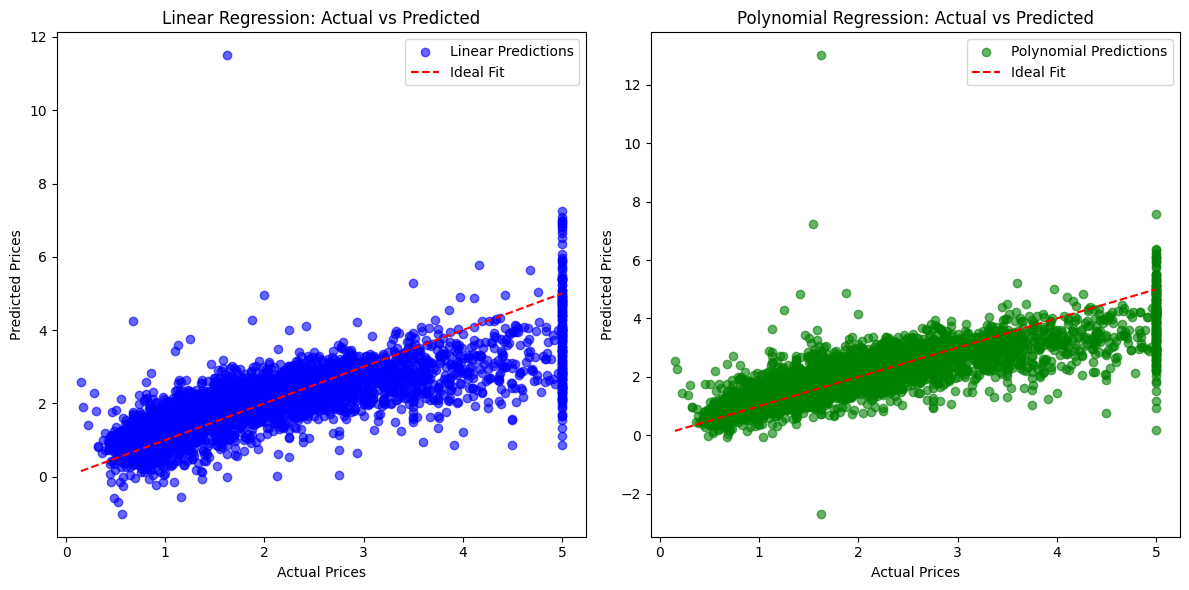

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)  # Load dataset as a pandas DataFrame
X = data.data  # Features
y = data.target  # Target (Median house prices)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Linear Regression
print("Linear Regression:")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R^2 Score: {r2_linear}")

# 4. Polynomial Regression (Degree = 2)
print("\nPolynomial Regression (Degree = 2):")
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),  # Add polynomial features
    ("linear_regression", LinearRegression())  # Apply linear regression
])
poly_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R^2 Score: {r2_poly}")

# 5. Visualization: Compare Actual vs Predicted Values
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6, color="blue", label="Linear Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()

# Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, alpha=0.6, color="green", label="Polynomial Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()
